In [1]:
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd
import numpy as np
import os

import tensorflow as tf
import tensorflow_probability as tfp

2024-06-20 13:43:16.138535: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-20 13:43:17.588298: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# check if this detects GPU - this should not as the virtual env was not built on a GPU
tf.config.list_physical_devices("GPU")

[]

In [119]:
# read in the data

# path to dfs
path_to_TS_dfs = "all_preprocessed_data/Block_0103/TS_ready_data_frames/"

In [120]:
# list the contents here
os.listdir(path_to_TS_dfs)

['extracted_features_sub_window_9.csv',
 'extracted_features_sub_window_10.csv',
 'extracted_features_sub_window_0.csv',
 'extracted_features_sub_window_7.csv',
 'extracted_features_sub_window_6.csv',
 'extracted_features_sub_window_11.csv',
 'extracted_features_sub_window_1.csv',
 'extracted_features_sub_window_8.csv',
 'extracted_features_sub_window_2.csv',
 'extracted_features_sub_window_5.csv',
 '.ipynb_checkpoints',
 'extracted_features_sub_window_4.csv',
 'extracted_features_sub_window_3.csv']

In [121]:
# get rid of the checkpointing folder
sub_image_files = [file for file in os.listdir(path_to_TS_dfs) if file[-3:] == 'csv']

In [122]:
sub_image_files.sort() #note that this would not properly sort the df files as the names are all characters
sub_image_files

['extracted_features_sub_window_0.csv',
 'extracted_features_sub_window_1.csv',
 'extracted_features_sub_window_10.csv',
 'extracted_features_sub_window_11.csv',
 'extracted_features_sub_window_2.csv',
 'extracted_features_sub_window_3.csv',
 'extracted_features_sub_window_4.csv',
 'extracted_features_sub_window_5.csv',
 'extracted_features_sub_window_6.csv',
 'extracted_features_sub_window_7.csv',
 'extracted_features_sub_window_8.csv',
 'extracted_features_sub_window_9.csv']

In [123]:
# add the 10, 11 at the end
im_files = ['extracted_features_sub_window_10.csv', 'extracted_features_sub_window_11.csv']

In [124]:
other_files = [i for i in sub_image_files if i not in im_files]

In [125]:
sub_image_files = other_files + im_files

In [126]:
sub_image_files

['extracted_features_sub_window_0.csv',
 'extracted_features_sub_window_1.csv',
 'extracted_features_sub_window_2.csv',
 'extracted_features_sub_window_3.csv',
 'extracted_features_sub_window_4.csv',
 'extracted_features_sub_window_5.csv',
 'extracted_features_sub_window_6.csv',
 'extracted_features_sub_window_7.csv',
 'extracted_features_sub_window_8.csv',
 'extracted_features_sub_window_9.csv',
 'extracted_features_sub_window_10.csv',
 'extracted_features_sub_window_11.csv']

In [127]:
# just get a df for a single sub image
sub_image_df_name = 'extracted_features_sub_window_0.csv'
sub_image_df_path = os.path.join(path_to_TS_dfs, sub_image_df_name)

In [128]:
sub_image_0_df = pd.read_csv(sub_image_df_path)

In [129]:
sub_image_0_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,tassel_count
0,0.047808,0.0,0.163277,0.0,0.0,0.139760,0.118066,0.119409,0.126903,0.0,...,0.0,0.0,0.074895,0.166230,0.0,0.175070,0.0,0.0,0.234499,3.000005
1,0.051878,0.0,0.199874,0.0,0.0,0.173280,0.152892,0.153999,0.185454,0.0,...,0.0,0.0,0.120129,0.210222,0.0,0.216824,0.0,0.0,0.299341,4.000000
2,0.028427,0.0,0.146221,0.0,0.0,0.107724,0.101584,0.091895,0.107017,0.0,...,0.0,0.0,0.051440,0.120263,0.0,0.135184,0.0,0.0,0.200811,4.000155
3,0.067860,0.0,0.194141,0.0,0.0,0.167222,0.153346,0.156017,0.171351,0.0,...,0.0,0.0,0.114997,0.195980,0.0,0.199689,0.0,0.0,0.285783,8.004741
4,0.000000,0.0,0.159352,0.0,0.0,0.127940,0.099525,0.103640,0.109911,0.0,...,0.0,0.0,0.059292,0.179243,0.0,0.174193,0.0,0.0,0.228390,4.000000


In [130]:
sub_image_0_df.shape

(20, 33)

In [131]:
# how does the sub count variation look like for this subwindow??

# we have 20 time points
range_time_points = np.arange(1,21)

tassel_counts = sub_image_0_df['tassel_count']

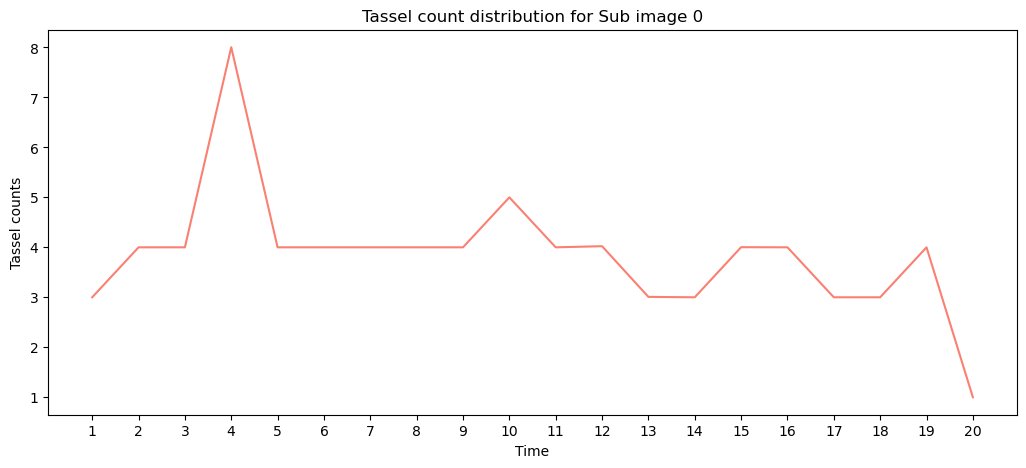

In [132]:
# look at this distribution
plt.figure(figsize = (12.5,5))
plt.plot(range_time_points, tassel_counts, color = 'salmon')
plt.xticks(range_time_points)
plt.title("Tassel count distribution for Sub image 0")
plt.xlabel("Time")
plt.ylabel("Tassel counts")
plt.show()

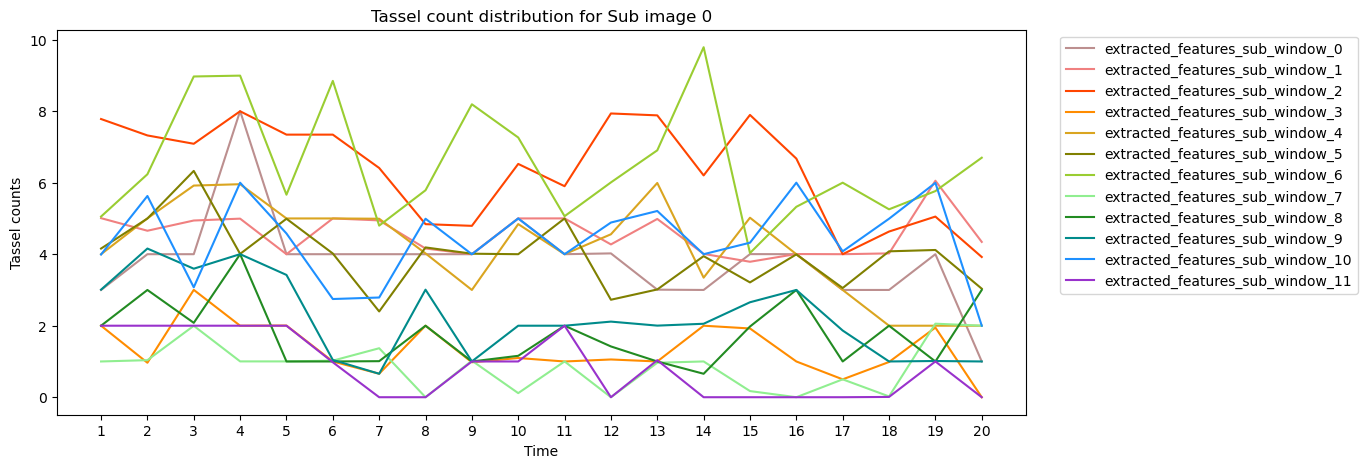

In [133]:
# Also draw a plot for all 12 subwindows on the same plot to see how the tassel count distributions look like?
colors = ['rosybrown', 'lightcoral', 'orangered', 'darkorange', 'goldenrod', 'olive', 'yellowgreen', 'lightgreen', 'forestgreen', 'darkcyan', 'dodgerblue',
         'darkorchid']
plt.figure(figsize = (12.5,5))
counter = 0
for file in sub_image_files:
    joined_path = os.path.join(path_to_TS_dfs, file)
    read_df = pd.read_csv(joined_path)
    tass_count = read_df['tassel_count']
    plt.plot(range_time_points, tass_count, color = colors[counter], label = file.split(".")[0])
    counter = counter + 1
plt.xticks(range_time_points)
plt.title("Tassel count distribution for Sub image 0")
plt.xlabel("Time")
plt.ylabel("Tassel counts")
plt.legend()
plt.legend(bbox_to_anchor=(1.35, 1), loc = 1)
plt.show()

In [134]:
# Okay, none of the plots look nice, but that's okay I guess

In [135]:
# Okay, lets now divide our data into train and test components: I'm thinking a 13-7 split (thats a 65%-35%, maybe too little data in the train split, lets change this later and stick to this for now)

In [136]:
13/20

0.65

In [137]:
forecast_steps = 7

In [138]:
train_data = sub_image_0_df.iloc[:-7, :]
test_data = sub_image_0_df.iloc[-7:, :]

In [139]:
train_data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,tassel_count
0,0.047808,0.0,0.163277,0.0,0.0,0.139760,0.118066,0.119409,0.126903,0.0,...,0.0,0.0,0.074895,0.166230,0.0,0.175070,0.0,0.0,0.234499,3.000005
1,0.051878,0.0,0.199874,0.0,0.0,0.173280,0.152892,0.153999,0.185454,0.0,...,0.0,0.0,0.120129,0.210222,0.0,0.216824,0.0,0.0,0.299341,4.000000
2,0.028427,0.0,0.146221,0.0,0.0,0.107724,0.101584,0.091895,0.107017,0.0,...,0.0,0.0,0.051440,0.120263,0.0,0.135184,0.0,0.0,0.200811,4.000155
3,0.067860,0.0,0.194141,0.0,0.0,0.167222,0.153346,0.156017,0.171351,0.0,...,0.0,0.0,0.114997,0.195980,0.0,0.199689,0.0,0.0,0.285783,8.004741
4,0.000000,0.0,0.159352,0.0,0.0,0.127940,0.099525,0.103640,0.109911,0.0,...,0.0,0.0,0.059292,0.179243,0.0,0.174193,0.0,0.0,0.228390,4.000000


In [140]:
train_data.shape

(13, 33)

In [141]:
test_data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,tassel_count
13,0.00000,0.000000,0.090929,0.051619,0.069533,0.037809,0.000000,0.000000,0.000000,0.049247,...,0.00000,0.045774,0.000000,0.074290,0.044656,0.092893,0.034058,0.029722,0.106921,3.000000
14,0.00000,0.006621,0.058541,0.037966,0.077929,0.000000,0.000000,0.000000,0.000000,0.054486,...,0.00000,0.073907,0.000000,0.050342,0.037198,0.074999,0.016264,0.056195,0.069757,4.002516
15,0.02545,0.000000,0.140345,0.034087,0.046189,0.109946,0.097038,0.095738,0.101402,0.031138,...,0.00000,0.023231,0.055358,0.134033,0.026537,0.139289,0.022806,0.000000,0.182940,4.000155
16,0.00000,0.164403,0.000000,0.182039,0.259804,0.000000,0.000000,0.000000,0.000000,0.166868,...,0.11707,0.214212,0.000000,0.000000,0.167544,0.000000,0.106120,0.237557,0.000000,3.000000
17,0.00000,0.082463,0.000000,0.069955,0.169646,0.000000,0.000000,0.000000,0.000000,0.101381,...,0.05950,0.148836,0.000000,0.000000,0.081987,0.000000,0.037315,0.159811,0.000000,3.000000


In [142]:
test_data.shape

(7, 33)

In [143]:
# Okay, let's plot the data as train and test as per the chapter 6 of the Bayesian computations book

In [144]:
train_counts = train_data['tassel_count']
test_counts = test_data['tassel_count']

In [145]:
np.arange(1, train_counts.shape[0] + 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [146]:
np.arange(train_counts.shape[0] + 1, train_counts.shape[0] + 1 + test_counts.shape[0])

array([14, 15, 16, 17, 18, 19, 20])

In [147]:
def plot_tassel_count_data(train_data, test_data, df_no, fig_ax=None):
    if not fig_ax:
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    else:
        fig, ax = fig_ax
    ax.plot(train_data, color = 'blue', label="training data")
    ax.plot(test_data, color = 'lightcoral', label="testing data")
    ax.legend()
    ax.set(
        ylabel="Tassel counts" + str(df_no),
        xlabel="Time",
        title = "Tassel count distribution for sub image"
    )
    fig.autofmt_xdate()
    fig.show()
    return fig, ax

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'Tassel count distribution for sub image'}, xlabel='Time', ylabel='Tassel counts0'>)

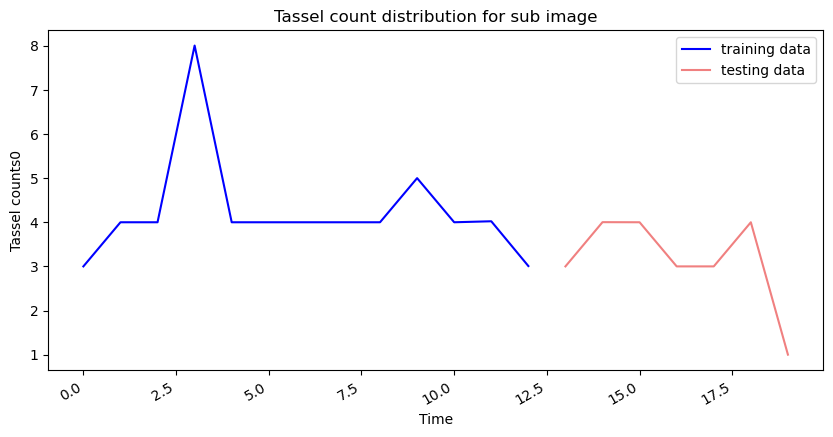

In [148]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_tassel_count_data(train_counts, test_counts, 0, (fig, ax))

In [149]:
# tfp particulars
tfd = tfp.distributions
root = tfd.JointDistributionCoroutine.Root

In [150]:
run_mcmc = tf.function(
    tfp.experimental.mcmc.windowed_adaptive_nuts,
    autograph=False, jit_compile=True)

In [151]:
# Now have to figure out how to write the prioirs, likelihood and joint density to draw samples from the posterioir

# # model code - like what we should refer - This code gives the prioirs
# def gam_trend_seasonality():
#     beta = yield root(tfd.Sample(
#         tfd.Normal(0., 1.),
#         sample_shape=n_pred,
#         name='beta'))
#     seasonality = tf.einsum('ij,...j->...i', X_pred, beta)

#     k = yield root(tfd.HalfNormal(10., name='k'))
#     m = yield root(tfd.Normal(
#         co2_by_month_training_data['CO2'].mean(), scale=5., name='m'))
#     tau = yield root(tfd.HalfNormal(10., name='tau'))
#     delta = yield tfd.Sample(tfd.Laplace(0., tau),
#                              sample_shape=n_changepoints,
#                              name='delta')

#     growth_rate = k[..., None] + tf.einsum('ij,...j->...i', A, delta)
#     offset = m[..., None] + tf.einsum('ij,...j->...i', A, -s * delta)
#     trend = growth_rate * t + offset
#     noise_sigma = yield root(tfd.HalfNormal(scale=5., name='noise_sigma'))
#     return seasonality, trend, noise_sigma

# I think nwe will only have the seasonality part and the noise sigma for our work

# we do not have seasonality per say, but we will have a Xbeta component - therefore need to follow along the code and get soenthing like the seasonality they have. and also, we will need a noise sigma. 


# We need X_preds, n_preds, we may also need to add an intercept, and then maybe just noise sigma?    

In [152]:
# let's first add a column for the intercept - to add this to the beggining use insert instead of the regular way
sub_image_0_df.insert(0, 'intercept', np.repeat(1, sub_image_0_df.shape[0]))
sub_image_0_df['intercept'] = sub_image_0_df['intercept'].astype("float32")
# sub_image_0_df

In [153]:
sub_image_0_df.head()

,intercept,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,tassel_count
0,1.0,0.047808,0.0,0.163277,0.0,0.0,0.139760,0.118066,0.119409,0.126903,...,0.0,0.0,0.074895,0.166230,0.0,0.175070,0.0,0.0,0.234499,3.000005
1,1.0,0.051878,0.0,0.199874,0.0,0.0,0.173280,0.152892,0.153999,0.185454,...,0.0,0.0,0.120129,0.210222,0.0,0.216824,0.0,0.0,0.299341,4.000000
2,1.0,0.028427,0.0,0.146221,0.0,0.0,0.107724,0.101584,0.091895,0.107017,...,0.0,0.0,0.051440,0.120263,0.0,0.135184,0.0,0.0,0.200811,4.000155
3,1.0,0.067860,0.0,0.194141,0.0,0.0,0.167222,0.153346,0.156017,0.171351,...,0.0,0.0,0.114997,0.195980,0.0,0.199689,0.0,0.0,0.285783,8.004741
4,1.0,0.000000,0.0,0.159352,0.0,0.0,0.127940,0.099525,0.103640,0.109911,...,0.0,0.0,0.059292,0.179243,0.0,0.174193,0.0,0.0,0.228390,4.000000


In [154]:
X_preds = sub_image_0_df.iloc[:, :-1]

In [155]:
X_preds.shape

(20, 33)

In [156]:
X_preds.head()

,intercept,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31
0,1.0,0.047808,0.0,0.163277,0.0,0.0,0.139760,0.118066,0.119409,0.126903,...,0.224370,0.0,0.0,0.074895,0.166230,0.0,0.175070,0.0,0.0,0.234499
1,1.0,0.051878,0.0,0.199874,0.0,0.0,0.173280,0.152892,0.153999,0.185454,...,0.271945,0.0,0.0,0.120129,0.210222,0.0,0.216824,0.0,0.0,0.299341
2,1.0,0.028427,0.0,0.146221,0.0,0.0,0.107724,0.101584,0.091895,0.107017,...,0.169587,0.0,0.0,0.051440,0.120263,0.0,0.135184,0.0,0.0,0.200811
3,1.0,0.067860,0.0,0.194141,0.0,0.0,0.167222,0.153346,0.156017,0.171351,...,0.253660,0.0,0.0,0.114997,0.195980,0.0,0.199689,0.0,0.0,0.285783
4,1.0,0.000000,0.0,0.159352,0.0,0.0,0.127940,0.099525,0.103640,0.109911,...,0.219698,0.0,0.0,0.059292,0.179243,0.0,0.174193,0.0,0.0,0.228390


In [157]:
# This X_preds above is a dataframe, let's make it a numpy array
X_pred = X_preds.values

In [158]:
# n_preds would be the number of X variables we have which is 32 + 1 along with the intercept
n_pred = X_pred.shape[1]
n_pred

33

In [159]:
def get_prioirs_and_x_beta():
    beta = yield root(tfd.Sample(
        tfd.Normal(0., 1.),
        sample_shape=n_pred,
        name='beta'))
    x_beta = tf.einsum('ij,...j->...i', X_pred, beta)

    noise_sigma = yield root(tfd.HalfNormal(scale=2., name='noise_sigma'))

    intercept_data = sub_image_0_df['intercept'].as_float32()

    return x_beta, intercept_data, noise_sigma

In [160]:
# well we do need a trend variable, because the AR function has a zeros like input based on trend as the strating values.

In [161]:
# spend some time here to properly do the function to implement the mcmc procedure

In [163]:
def generate_model_ar_latent(training=True):

    @tfd.JointDistributionCoroutine
    def model_with_latent_ar():
        x_beta, intercept_data, noise_sigma = yield from get_prioirs_and_x_beta()
        
        # Latent AR(1)
        ar_sigma = yield root(tfd.HalfNormal(.1, name='ar_sigma'))
        rho = yield root(tfd.Uniform(-1., 1., name='rho'))
        def ar_fun(y):
            loc = tf.concat([tf.zeros_like(y[..., :1]), y[..., :-1]],
                            axis=-1) * rho[..., None]
            return tfd.Independent(
                tfd.Normal(loc=loc, scale=ar_sigma[..., None]),
                reinterpreted_batch_ndims=1)
        temporal_error = yield tfd.Autoregressive(
            distribution_fn=ar_fun,
            sample0=tf.zeros_like(intercept_data),
            num_steps=intercept_data.shape[-1],
            name='temporal_error')

        # Linear prediction
        y_hat = x_beta + temporal_error
        if training:
            y_hat = y_hat[..., :train_data.shape[0]]

        # Likelihood
        observed = yield tfd.Independent(
            tfd.Normal(y_hat, noise_sigma[..., None]),
            reinterpreted_batch_ndims=1,
            name='observed'
        )

    return model_with_latent_ar

In [164]:
%%time
gam_with_latent_ar = generate_model_ar_latent(training = True)

CPU times: user 1.07 ms, sys: 45 µs, total: 1.12 ms
Wall time: 1.14 ms


In [166]:
%%time
plt.figure(figsize = (5,2))
plt.plot(tf.transpose(generate_model_ar_latent.sample(50)[-1]))
plt.show()

AttributeError: 'function' object has no attribute 'sample'

<Figure size 500x200 with 0 Axes>